# Song Likeness Code
Following the method used in the authors guide (Palash Sharma, 2020) we merged gathered playlists and using an additional added column of "liked songs" we then began editing the datasets to be used in the model. The final goal is to use logistical regression model 

In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 
import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings

# Data Insertion
Here we insert our liked and dislike playlists into the code and finally merge the two together for the model. 

In [2]:
like_songs = pd.read_csv("playlist_0.csv",index_col=[0])

like_songs.head()

,id,title,first_artist,all_artists,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,num_bars,num_sections,num_segments
0,3LhtqibvTtjOUrzKs7Vsz1,Identikit,Radiohead,['Radiohead'],0.692,0.458,11,-9.461,0,0.06350,0.5160,0.1360,0.350,150.695,266644,4,162,11,1036
1,7FPwg4rUQEKmMT9hCV1G3t,Sony Dub - Dub Version,Big Audio Dynamite,['Big Audio Dynamite'],0.744,0.676,4,-13.066,1,0.07990,0.7580,0.0668,0.778,116.914,254360,4,124,13,1377
2,3kkDPzmtGVHhmedF3v9k7v,Corpses In Their Mouths,Ian Brown,['Ian Brown'],0.779,0.529,10,-12.243,0,0.00557,0.0943,0.1100,0.917,108.804,249267,4,113,13,1008
3,5lzLhFRsmQ7oOgbMOnbMmb,St. Petersburg,Supergrass,['Supergrass'],0.476,0.605,6,-8.569,0,0.40000,0.5440,0.1050,0.458,125.002,189547,4,96,11,602
4,1HZcj0qHRNHoBCFYrTe9qY,Dark Globe,Syd Barrett,['Syd Barrett'],0.462,0.152,7,-14.059,1,0.40100,0.0000,0.1140,0.469,141.413,122240,4,69,7,351


In [3]:
dislike_songs = pd.read_csv("playlist_1.csv",index_col=[0])

dislike_songs.head()

,id,title,first_artist,all_artists,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,num_bars,num_sections,num_segments
0,53bZYxVbCYm6w1Gx8U64bz,Settling Down,Miranda Lambert,['Miranda Lambert'],0.643,0.756,6,-5.800,0,0.0215,0.000268,0.101,0.934,90.001,197453,4,73,6,883
1,1kBx9VGumfuvlfqdlAGorE,Hell Of A View,Eric Church,['Eric Church'],0.689,0.582,5,-6.778,1,0.1190,0.004640,0.101,0.883,99.021,175280,4,68,9,585
2,6gdLyYNuhWBzqwlOFSsXC7,Better Together,Luke Combs,['Luke Combs'],0.552,0.225,0,-11.501,1,0.8270,0.000000,0.111,0.670,138.002,219573,4,120,8,617
3,14JFKtBSqefxfMiKhq6JT8,Almost Maybes,Jordan Davis,['Jordan Davis'],0.582,0.868,11,-3.927,1,0.1460,0.000000,0.103,0.555,90.105,179153,4,66,9,706
4,0x5aqRejnsR6kiMq0ficsp,How Many Times,Kat & Alex,['Kat & Alex'],0.514,0.728,10,-7.216,1,0.1040,0.000000,0.138,0.333,144.022,205798,4,120,8,693


In [4]:
like_songs['song_like'] = np.ones((len(like_songs), 1), dtype=int)

like_songs.head()

,id,title,first_artist,all_artists,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,num_bars,num_sections,num_segments,song_like
0,3LhtqibvTtjOUrzKs7Vsz1,Identikit,Radiohead,['Radiohead'],0.692,0.458,11,-9.461,0,0.06350,0.5160,0.1360,0.350,150.695,266644,4,162,11,1036,1
1,7FPwg4rUQEKmMT9hCV1G3t,Sony Dub - Dub Version,Big Audio Dynamite,['Big Audio Dynamite'],0.744,0.676,4,-13.066,1,0.07990,0.7580,0.0668,0.778,116.914,254360,4,124,13,1377,1
2,3kkDPzmtGVHhmedF3v9k7v,Corpses In Their Mouths,Ian Brown,['Ian Brown'],0.779,0.529,10,-12.243,0,0.00557,0.0943,0.1100,0.917,108.804,249267,4,113,13,1008,1
3,5lzLhFRsmQ7oOgbMOnbMmb,St. Petersburg,Supergrass,['Supergrass'],0.476,0.605,6,-8.569,0,0.40000,0.5440,0.1050,0.458,125.002,189547,4,96,11,602,1
4,1HZcj0qHRNHoBCFYrTe9qY,Dark Globe,Syd Barrett,['Syd Barrett'],0.462,0.152,7,-14.059,1,0.40100,0.0000,0.1140,0.469,141.413,122240,4,69,7,351,1


In [5]:
dislike_songs['song_like'] = np.zeros((len(dislike_songs), 1), dtype=int)

dislike_songs.head()

,id,title,first_artist,all_artists,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,num_bars,num_sections,num_segments,song_like
0,53bZYxVbCYm6w1Gx8U64bz,Settling Down,Miranda Lambert,['Miranda Lambert'],0.643,0.756,6,-5.800,0,0.0215,0.000268,0.101,0.934,90.001,197453,4,73,6,883,0
1,1kBx9VGumfuvlfqdlAGorE,Hell Of A View,Eric Church,['Eric Church'],0.689,0.582,5,-6.778,1,0.1190,0.004640,0.101,0.883,99.021,175280,4,68,9,585,0
2,6gdLyYNuhWBzqwlOFSsXC7,Better Together,Luke Combs,['Luke Combs'],0.552,0.225,0,-11.501,1,0.8270,0.000000,0.111,0.670,138.002,219573,4,120,8,617,0
3,14JFKtBSqefxfMiKhq6JT8,Almost Maybes,Jordan Davis,['Jordan Davis'],0.582,0.868,11,-3.927,1,0.1460,0.000000,0.103,0.555,90.105,179153,4,66,9,706,0
4,0x5aqRejnsR6kiMq0ficsp,How Many Times,Kat & Alex,['Kat & Alex'],0.514,0.728,10,-7.216,1,0.1040,0.000000,0.138,0.333,144.022,205798,4,120,8,693,0


In [6]:
like_songs.shape

(330, 20)

In [7]:
dislike_songs.shape

(357, 20)

In [8]:
songs = like_songs.append(dislike_songs,ignore_index=False)
songs.tail()

,id,title,first_artist,all_artists,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,num_bars,num_sections,num_segments,song_like
352,4WVl3or8Xtnvv4XfSqAVNY,Those Good Old Dreams,Carpenters,['Carpenters'],0.539,0.451,6,-14.272,1,0.628,0.000167,0.0565,0.531,92.396,253067,4,95,13,987,0
353,6vuEG9sZtC4W2zT64f7zLF,Alone Again (Naturally),Gilbert O'Sullivan,"[""Gilbert O'Sullivan""]",0.558,0.464,8,-8.488,0,0.583,0.000133,0.1590,0.559,171.762,217729,4,154,10,755,0
354,4FZ8wtTaOAbYvyChBt4GEQ,Song Sung Blue - Single Version,Neil Diamond,['Neil Diamond'],0.556,0.327,0,-15.612,1,0.467,0.000013,0.3180,0.327,108.913,195160,4,87,8,645,0
355,03MOcbkkoNLjP0G91iODSB,Quando Quando Quando,Engelbert Humperdinck,['Engelbert Humperdinck'],0.366,0.589,0,-8.956,1,0.251,0.000001,0.0791,0.840,175.935,201440,4,142,10,666,0
356,15ADURMdkO25JGD5mIcodM,Lucille,Kenny Rogers,['Kenny Rogers'],0.646,0.362,5,-11.954,1,0.724,0.000000,0.1340,0.387,142.460,220867,3,171,15,757,0


In [9]:
songs.shape

(687, 20)

In [10]:
songs = songs.drop_duplicates()

songs.shape

(655, 20)

Here we drop the columns that are not needed for the prediction model 

In [11]:
songs = songs.drop(['id','first_artist','all_artists'], axis = 1)

In [12]:
songs.head()

,title,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,num_bars,num_sections,num_segments,song_like
0,Identikit,0.692,0.458,11,-9.461,0,0.06350,0.5160,0.1360,0.350,150.695,266644,4,162,11,1036,1
1,Sony Dub - Dub Version,0.744,0.676,4,-13.066,1,0.07990,0.7580,0.0668,0.778,116.914,254360,4,124,13,1377,1
2,Corpses In Their Mouths,0.779,0.529,10,-12.243,0,0.00557,0.0943,0.1100,0.917,108.804,249267,4,113,13,1008,1
3,St. Petersburg,0.476,0.605,6,-8.569,0,0.40000,0.5440,0.1050,0.458,125.002,189547,4,96,11,602,1
4,Dark Globe,0.462,0.152,7,-14.059,1,0.40100,0.0000,0.1140,0.469,141.413,122240,4,69,7,351,1


# Predicition Model method
Here we are beginning to build the variables to insert into our regression model. We intially start by build our visualations for the likes and dislikes of the dataset. The key use of this intial plotting is to get an idea of the distribution of our liked and disliked data. This will give us better understanding in the final results.

In [13]:
prediction = songs.drop(['title'], axis = 1)

In [14]:
prediction.head()

,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,num_bars,num_sections,num_segments,song_like
0,0.692,0.458,11,-9.461,0,0.06350,0.5160,0.1360,0.350,150.695,266644,4,162,11,1036,1
1,0.744,0.676,4,-13.066,1,0.07990,0.7580,0.0668,0.778,116.914,254360,4,124,13,1377,1
2,0.779,0.529,10,-12.243,0,0.00557,0.0943,0.1100,0.917,108.804,249267,4,113,13,1008,1
3,0.476,0.605,6,-8.569,0,0.40000,0.5440,0.1050,0.458,125.002,189547,4,96,11,602,1
4,0.462,0.152,7,-14.059,1,0.40100,0.0000,0.1140,0.469,141.413,122240,4,69,7,351,1


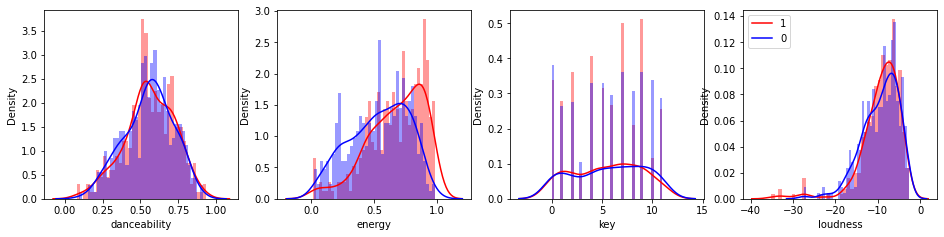

In [15]:
plt.figure(figsize=(16,16))
plt.subplot(4,4,1)
sns.distplot(songs[songs['song_like']==1]['danceability'], color='red', bins=40)
sns.distplot(songs[songs['song_like']==0]['danceability'], color='blue', bins=40)
plt.subplot(4,4,2)
sns.distplot(songs[songs['song_like']==1]['energy'], color='red', bins=40)
sns.distplot(songs[songs['song_like']==0]['energy'], color='blue', bins=40)
plt.subplot(4,4,3)
sns.distplot(songs[songs['song_like']==1]['key'], color='red', bins=40)
sns.distplot(songs[songs['song_like']==0]['key'], color='blue', bins=40)
plt.subplot(4,4,4)
sns.distplot(songs[songs['song_like']==1]['loudness'], color='red', bins=40)
sns.distplot(songs[songs['song_like']==0]['loudness'], color='blue', bins=40)
plt.legend((1,0))

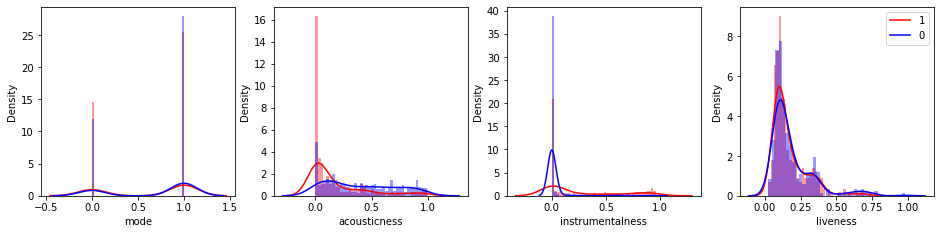

In [16]:
plt.figure(figsize=(16,16))
plt.subplot(4,4,1)
sns.distplot(songs[songs['song_like']==1]['mode'], color='red', bins=40)
sns.distplot(songs[songs['song_like']==0]['mode'], color='blue', bins=40)
plt.subplot(4,4,2)
sns.distplot(songs[songs['song_like']==1]['acousticness'], color='red', bins=40)
sns.distplot(songs[songs['song_like']==0]['acousticness'], color='blue', bins=40)
plt.subplot(4,4,3)
sns.distplot(songs[songs['song_like']==1]['instrumentalness'], color='red', bins=40)
sns.distplot(songs[songs['song_like']==0]['instrumentalness'], color='blue', bins=40)
plt.subplot(4,4,4)
sns.distplot(songs[songs['song_like']==1]['liveness'], color='red', bins=40)
sns.distplot(songs[songs['song_like']==0]['liveness'], color='blue', bins=40)
plt.legend((1,0))

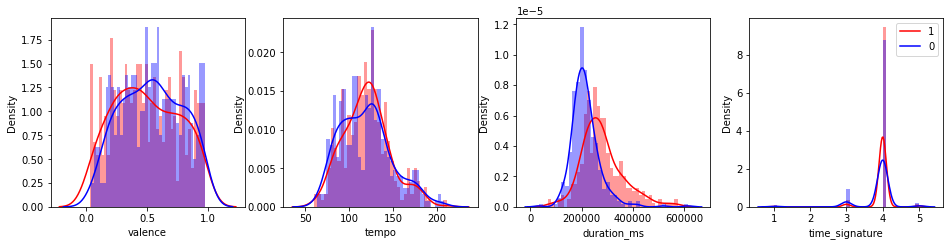

In [17]:
plt.figure(figsize=(16,16))
plt.subplot(4,4,1)
sns.distplot(songs[songs['song_like']==1]['valence'], color='red', bins=40)
sns.distplot(songs[songs['song_like']==0]['valence'], color='blue', bins=40)
plt.subplot(4,4,2)
sns.distplot(songs[songs['song_like']==1]['tempo'], color='red', bins=40)
sns.distplot(songs[songs['song_like']==0]['tempo'], color='blue', bins=40)
plt.subplot(4,4,3)
sns.distplot(songs[songs['song_like']==1]['duration_ms'], color='red', bins=40)
sns.distplot(songs[songs['song_like']==0]['duration_ms'], color='blue', bins=40)
plt.subplot(4,4,4)
sns.distplot(songs[songs['song_like']==1]['time_signature'], color='red', bins=40)
sns.distplot(songs[songs['song_like']==0]['time_signature'], color='blue', bins=40)
plt.legend((1,0))

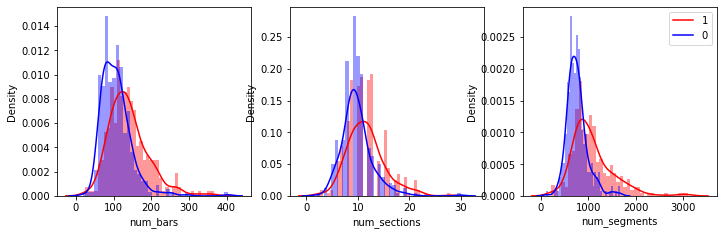

In [18]:
plt.figure(figsize=(16,16))
plt.subplot(4,4,1)
sns.distplot(songs[songs['song_like']==1]['num_bars'], color='red', bins=40)
sns.distplot(songs[songs['song_like']==0]['num_bars'], color='blue', bins=40)
plt.subplot(4,4,2)
sns.distplot(songs[songs['song_like']==1]['num_sections'], color='red', bins=40)
sns.distplot(songs[songs['song_like']==0]['num_sections'], color='blue', bins=40)
plt.subplot(4,4,3)
sns.distplot(songs[songs['song_like']==1]['num_segments'], color='red', bins=40)
sns.distplot(songs[songs['song_like']==0]['num_segments'], color='blue', bins=40)
plt.legend((1,0))

# Logistic Regression Classifier
We now create two different machine learning classifiers and will use the best performing method to make our predictions. The first classifier, Logistic Regression is used to predict a categorical dependent variable, given a set of independent variables. 

In [19]:
X_train = prediction.drop('song_like', axis=1)
X_test = songs.drop(['song_like','title'], axis=1)
y_train = prediction['song_like']
y_test = songs['song_like']

In [20]:
X_train.head()

,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,num_bars,num_sections,num_segments
0,0.692,0.458,11,-9.461,0,0.06350,0.5160,0.1360,0.350,150.695,266644,4,162,11,1036
1,0.744,0.676,4,-13.066,1,0.07990,0.7580,0.0668,0.778,116.914,254360,4,124,13,1377
2,0.779,0.529,10,-12.243,0,0.00557,0.0943,0.1100,0.917,108.804,249267,4,113,13,1008
3,0.476,0.605,6,-8.569,0,0.40000,0.5440,0.1050,0.458,125.002,189547,4,96,11,602
4,0.462,0.152,7,-14.059,1,0.40100,0.0000,0.1140,0.469,141.413,122240,4,69,7,351


In [21]:
X_test.head()

,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,num_bars,num_sections,num_segments
0,0.692,0.458,11,-9.461,0,0.06350,0.5160,0.1360,0.350,150.695,266644,4,162,11,1036
1,0.744,0.676,4,-13.066,1,0.07990,0.7580,0.0668,0.778,116.914,254360,4,124,13,1377
2,0.779,0.529,10,-12.243,0,0.00557,0.0943,0.1100,0.917,108.804,249267,4,113,13,1008
3,0.476,0.605,6,-8.569,0,0.40000,0.5440,0.1050,0.458,125.002,189547,4,96,11,602
4,0.462,0.152,7,-14.059,1,0.40100,0.0000,0.1140,0.469,141.413,122240,4,69,7,351


In [22]:
y_train.tail()

352    0
353    0
354    0
355    0
356    0
Name: song_like, dtype: int32

In [23]:
y_test.head()

0    1
1    1
2    1
3    1
4    1
Name: song_like, dtype: int32

In [24]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

In [25]:
lr_pred = lr_model.predict(X_test)
print(confusion_matrix(y_test, lr_pred))
print('\n')
print(classification_report(y_test, lr_pred))

[[267  76]
 [113 199]]


              precision    recall  f1-score   support

           0       0.70      0.78      0.74       343
           1       0.72      0.64      0.68       312

    accuracy                           0.71       655
   macro avg       0.71      0.71      0.71       655
weighted avg       0.71      0.71      0.71       655



# KNeighbours Classifier 
Next for more depth in our model results we insert an additional model using the KNeighbours Classifier. We will then take the results of this model and our previous to compare and decide on the more accurate model. 

In [26]:
knn_model = KNeighborsClassifier() 
  
knn_model.fit(X_train, y_train) 

KNeighborsClassifier()

In [27]:
knn_pred = knn_model.predict(X_test)
print(confusion_matrix(y_test, knn_pred))
print('\n')
print(classification_report(y_test, knn_pred))

[[276  67]
 [ 75 237]]


              precision    recall  f1-score   support

           0       0.79      0.80      0.80       343
           1       0.78      0.76      0.77       312

    accuracy                           0.78       655
   macro avg       0.78      0.78      0.78       655
weighted avg       0.78      0.78      0.78       655



In [28]:
songs['prediction'] = lr_pred

In [29]:
songs.sort_values('title').head()

,title,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,num_bars,num_sections,num_segments,song_like,prediction
78,#3,0.167,0.0710,6,-27.108,0,0.911000,0.855000,0.1070,0.0613,143.315,464293,5,270,18,1560,1,1
288,'75 aka Stay With You,0.712,0.8270,1,-7.331,1,0.030600,0.796000,0.1220,0.3050,126.001,371507,4,196,13,1782,1,1
231,(Is This The Way To) Amarillo,0.591,0.8080,9,-7.301,1,0.355000,0.000015,0.6890,0.5730,134.744,191867,4,105,10,706,0,0
211,(There'll Be Bluebirds Over) The White Cliffs ...,0.284,0.0694,8,-18.341,1,0.894000,0.000024,0.0992,0.2760,80.334,199867,3,85,10,545,0,0
147,18 and Life,0.457,0.7940,1,-6.624,0,0.000384,0.000072,0.1310,0.3540,90.439,231280,4,83,11,665,1,0


In [30]:
final_prediction = songs[['title','song_like','prediction']]


In [31]:
final_prediction

,title,song_like,prediction
0,Identikit,1,1
1,Sony Dub - Dub Version,1,1
2,Corpses In Their Mouths,1,0
3,St. Petersburg,1,0
4,Dark Globe,1,0
...,...,...,...
352,Those Good Old Dreams,0,0
353,Alone Again (Naturally),0,0
354,Song Sung Blue - Single Version,0,0
355,Quando Quando Quando,0,0


Here we are simply adding our final prediction dataset into a new csv file for sharing

In [32]:
final_prediction.to_csv('final_prediction_out.csv')

In [33]:
pd.set_option('display.max_rows', final_prediction.shape[0]+1)
print(final_prediction)

                                                 title  song_like  prediction
0                                            Identikit          1           1
1                               Sony Dub - Dub Version          1           1
2                              Corpses In Their Mouths          1           0
3                                       St. Petersburg          1           0
4                                           Dark Globe          1           0
5                                                Pilot          1           1
6                                Collapsing New People          1           1
7                                    Juxtapozed with U          1           0
8                                 Equinoxe 4 - VR Live          1           0
9                                    Hunted By A Freak          1           1
10                          The Sprawl (Album Version)          1           1
11                                   Coffee In The Pot          